In [ ]:
import numpy as np
from PIL import Image

image = np.array(
    [[255,   0, 255],
     [120, 200, 100],
     [200, 128,  50]]
)
print(image.shape)
print(image[1][2])

img = Image.fromarray(image)
img.show()
img.save('test.png','PNG')

In [2]:
import numpy as np
from PIL import Image

color_image = np.array(
[ [ [255, 255, 255],[  0,   0,   0],[128, 128, 128]],
  [ [255,   0,   0],[  0, 255,   0],[  0,   0, 255]],
  [ [255, 255,   0],[255,   0, 255],[  0, 255, 255] ]]
)
print(color_image.shape)
print(color_image[1][2])
print(color_image[1][2][2])

clrimg = Image.fromarray(color_image.astype(np.uint8))
clrimg.show()

(3, 3, 3)
[  0   0 255]
255


In [7]:
import numpy as np
import cv2

img = cv2.imread('checkerboard_pattern.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pts1 = np.float32([[100,100], [180,100], [200,200]])
pts2 = np.float32([[100,100], [190,120], [220,220]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, img.shape[:2])

cv2.circle(img, pts1[0].astype(np.uint8), 2, (255,0,0), 2)
cv2.circle(img, pts1[1].astype(np.uint8), 2, (0,255,0), 2)
cv2.circle(img, pts1[2].astype(np.uint8), 2, (0,0,255), 2)
cv2.circle(dst, pts2[0].astype(np.uint8), 2, (255,0,0), 2)
cv2.circle(dst, pts2[1].astype(np.uint8), 2, (0,255,0), 2)
cv2.circle(dst, pts2[2].astype(np.uint8), 2, (0,0,255), 2)

cv2.imshow('Origianl', img)
cv2.imshow('Affine', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

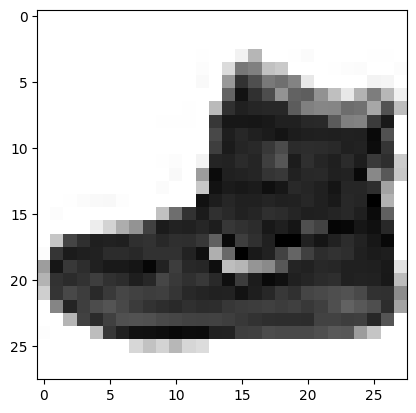

In [9]:
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()
plt.imshow(train_images[0], cmap=plt.cm.binary)

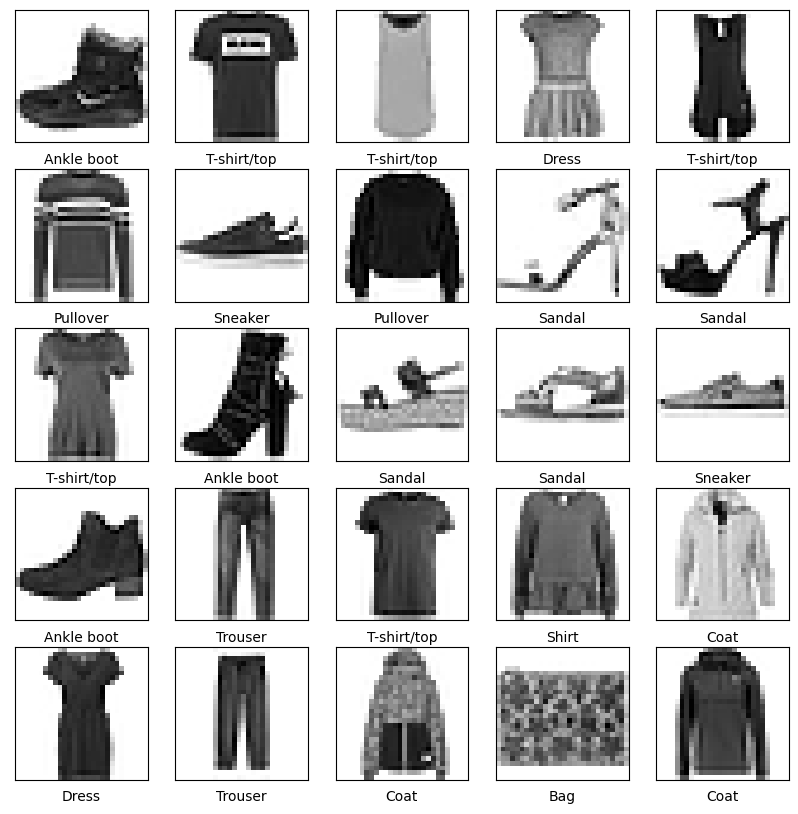

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
import numpy as np

x = np.array([[1,1,1,0,0],
              [0,1,1,1,0],
              [0,0,1,1,1],
              [0,1,1,1,0],
              [0,1,1,0,0]], dtype=float)
kernel = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])

y = cv2.filter2D(x, -1, kernel, borderType=cv2.BORDER_CONSTANT)
print(y)

[[3. 5. 5. 3. 1.]
 [3. 6. 7. 6. 3.]
 [2. 5. 8. 7. 4.]
 [2. 5. 7. 6. 3.]
 [2. 4. 5. 3. 1.]]


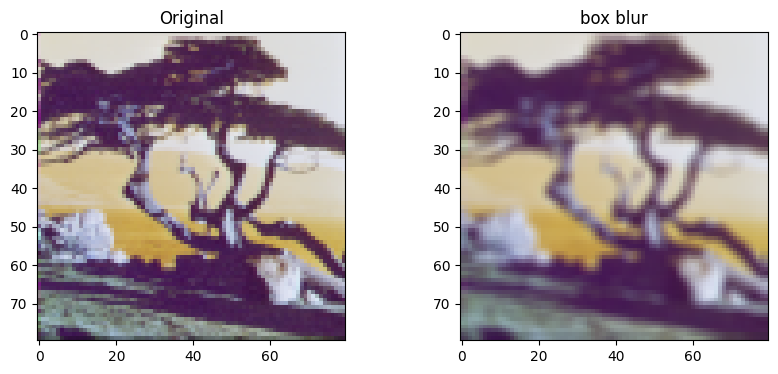

In [14]:
from tensorflow import keras
import cv2

image_url = 'https://sipi.usc.edu/database/download.php?vol=misc&img=4.1.06'
filename = 'tree.png'
image_path = keras.utils.get_file(filename, image_url)
source = cv2.imread(image_path)
image = cv2.resize(source, dsize=(80,80), interpolation=cv2.INTER_AREA)

box_blur = np.array([[1,1,1],
                     [1,1,1],
                     [1,1,1]])/9
dest = cv2.filter2D(image, -1, box_blur)
plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.subplot(122),plt.imshow(dest),plt.title('box blur')

plt.show()

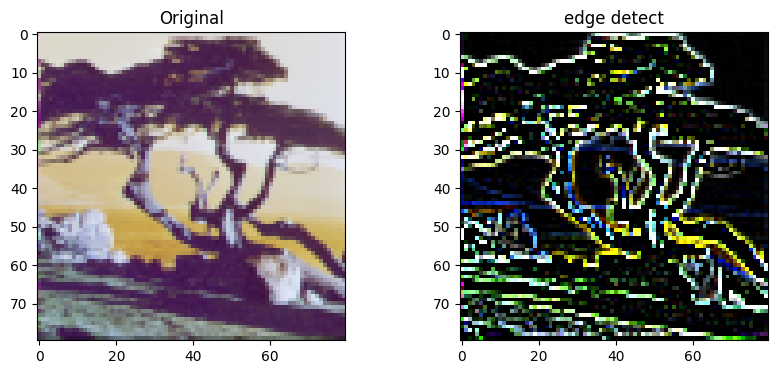

In [15]:
edge_detect = np.array([[-1,-1,-1],
                        [-1, 8,-1],
                        [-1,-1,-1]])
kernel = edge_detect
dest = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.subplot(122),plt.imshow(dest),plt.title('edge detect')

plt.show()

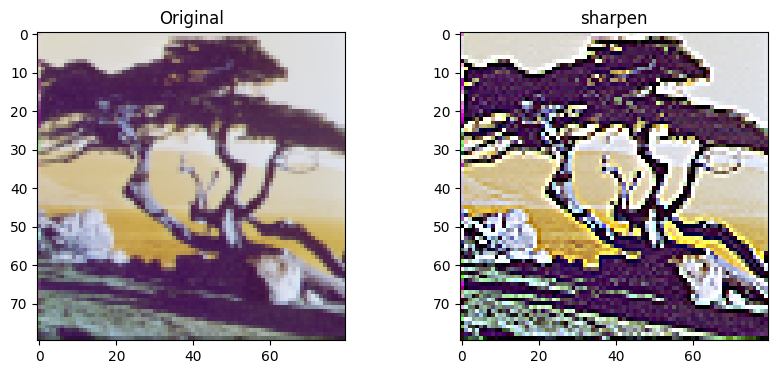

In [16]:
sharpen = np.array([[ 0,-1, 0],
                        [-1, 5,-1],
                        [ 0,-1, 0]])
kernel = sharpen
dest = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.subplot(122),plt.imshow(dest),plt.title('sharpen')

plt.show()